In [1]:
import pandas as pd
import numpy as np
import os
import json
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from skimage import feature, color, io
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

First training annotation: {'id': 0, 'image_id': 0, 'category_id': 1, 'bbox': [119, 25, 205, 606], 'area': 124230, 'segmentation': [], 'iscrowd': 0}


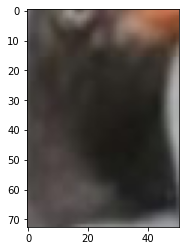

In [2]:
# Define paths
train_dir = 'Last_Train_Set'
valid_dir = 'Penguins vs Turtles/archive/valid/valid'
train_ann = 'train_annotations'
valid_ann = 'valid_annotations'

# Load annotations
with open(train_ann, 'r') as f:
    train_annotations = json.load(f)

with open(valid_ann, 'r') as f:
    valid_annotations = json.load(f)

# Display the first annotation
print(f"First training annotation: {train_annotations[0]}")

# Define the path to the first imag
first_image_path = os.path.join(train_dir, f"{str(train_annotations[0]['image_id']).zfill(1)}.jpg")

# Open the image
with Image.open(first_image_path) as img:
    plt.imshow(img)
    plt.show()

In [6]:
# HOG features from an image
def extract_features(image_path):
    with Image.open(image_path) as img:
        img_resized = img.resize((225, 225))  # resize image
        img_gray = color.rgb2gray(np.array(img_resized))  # convert to grayscale
        features, hog_image = feature.hog(img_gray, orientations=20, pixels_per_cell=(16, 16), visualize=True)
    return features

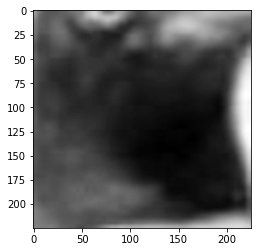

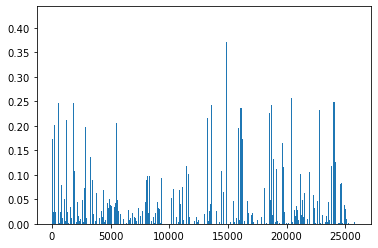

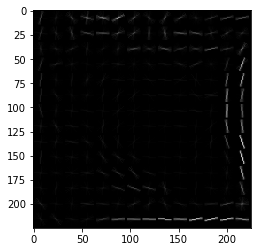

In [7]:
# Open the image resize and convert
with Image.open(first_image_path) as img:
    img_resized = img.resize((225, 225))
    gray_img = color.rgb2gray(np.array(img_resized))
    plt.imshow(gray_img, cmap='gray')
    plt.show()

# Compute the HOG features of the grayscale image
hog_features, hog_image = feature.hog(gray_img, orientations=20, pixels_per_cell=(16, 16), visualize=True)

##Computing the LBP features of the grayscale image
first_image_features = extract_features(first_image_path)


# Plot the histogram
plt.bar(range(len(first_image_features)), first_image_features)
plt.show()

# Display the HOG image
plt.imshow(hog_image, cmap='gray')
plt.show()

In [8]:
# Prepare the train data
X_train = []
y_train = []

for annotation in train_annotations:
    image_path = os.path.join(train_dir, f"{str(annotation['image_id']).zfill(1)}.jpg")
    features = extract_features(image_path) 
    X_train.append(features)
    y_train.append(annotation['category_id'])

# Convert lists to arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Split the dataset for training and validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Train the SVM
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [9]:
# Make predictions on the validation set
y_pred = clf.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Penguin', 'Turtle']))

Confusion Matrix:
[[60 12]
 [ 9 69]]

Classification Report:
              precision    recall  f1-score   support

     Penguin       0.87      0.83      0.85        72
      Turtle       0.85      0.88      0.87        78

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



In [10]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 20, 30, 50, 100, 200, 500, 1000], 
              'gamma': [1, 0.5, 0.2, 0.01, 0.05, 0.01, 0.005, 0.001, 0.0001],
              'kernel': ['rbf']} 

# Create a GridSearchCV object
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)
 
# Fit the model to the data
grid.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid.best_params_}")

# Print the best score
print(f"Best score: {grid.best_score_}")

# Make predictions on the validation set
grid_predictions = grid.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, grid_predictions))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, grid_predictions, target_names=['Penguin', 'Turtle']))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   1.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   1.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   1.2s
[CV 1/5] END ......C=0.1, gamma=0.5, kernel=rbf;, score=0.514 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.5, kernel=rbf;, score=0.514 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.5, kernel=rbf;, score=0.514 total time=   1.0s
[CV 4/5] END ......C=0.1, gamma=0.5, kernel=rbf;, score=0.500 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.5, kernel=rbf;, score=0.500 total time=   1.0s
[CV 1/5] END ......C=0.1, gamma=0.2, kernel=rbf;, score=0.514 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.2, kernel=rbf

In [12]:
# Prepare the validation data
X_valid = []
y_valid = []

for annotation in valid_annotations:
    image_path = os.path.join(valid_dir, f"image_id_{str(annotation['image_id']).zfill(3)}.jpg")
    features = extract_features(image_path) 
    X_valid.append(features)
    y_valid.append(annotation['category_id'])

# Convert lists to arrays
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

# Make predictions on the validation set
y_valid_pred = grid.predict(X_valid)

# Print the confusion matrix
print("Confusion Matrix for Validation Set:")
print(confusion_matrix(y_valid, y_valid_pred))

# Print the classification report
print("\nClassification Report for Validation Set:")
print(classification_report(y_valid, y_valid_pred, target_names=['Penguin', 'Turtle']))

# Print the accuracy on the validation set
print(f"Validation accuracy: {grid.score(X_valid, y_valid)}")

Confusion Matrix for Validation Set:
[[23 13]
 [ 4 32]]

Classification Report for Validation Set:
              precision    recall  f1-score   support

     Penguin       0.85      0.64      0.73        36
      Turtle       0.71      0.89      0.79        36

    accuracy                           0.76        72
   macro avg       0.78      0.76      0.76        72
weighted avg       0.78      0.76      0.76        72

Validation accuracy: 0.7638888888888888
